In [2]:
#setting seeds for random generator
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm 
from scipy import stats
from IPython.display import display
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score
!pip install ml_metrics
import ml_metrics as metrics


def cut_first_null(country_df):
    n = len(country_df.index)
    last_null = -1
    for i in range(n - 1, 0, -1):
        if (country_df.iloc[i]['New_cases'] == 0):
            last_null = i
            break

    nonzero_country_df = country_df.loc[last_null + 1:].reset_index(drop=True)

    return (nonzero_country_df, last_null + 1)


def differentiation_country(country_df):    
    series = country_df['New_cases'].copy()
    
    #integration
    series_diff = series

    for i in range(10000):
        test = sm.tsa.adfuller(series_diff)
        print ('adf: ', test[0])
        print ('p-value: ', test[1])
        print ('Critical values: ', test[4])
        if test[0] > test[4]['5%']: 
            print ('есть единичные корни, ряд не стационарен')
        else:
            print ('единичных корней нет, ряд стационарен')
            break
        series_diff = series_diff.diff(periods=1).dropna()
        
            
    ax = series_diff.plot(figsize=(20, 8), grid = 'True')
    fig = ax.get_figure()
    #fig.savefig(str(i)+ Country + 'diff.png', dpi = 150)
    
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(series.values.squeeze(), lags=25, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_acf(series_diff.values.squeeze(), lags=25, ax=ax2)
    #fig.savefig(Country + 'acf_init_' + str(i) + 'diff.png', dpi = 150)
    return series_diff


def form_country_plot(df, Country):
    country_df = df[df['Country'] == Country].reset_index(drop=True)
    country_df = country_df[['Date_reported','New_cases']].copy()
    display(country_df)
    
    ax = country_df.plot(x = 'Date_reported', y = 'New_cases', figsize=(20, 8), grid = 'True')
    fig = ax.get_figure()
    #fig.savefig(Country + '.png', dpi = 150)
    
    n = len(country_df.index)
    work_class = []
    #print(n)
    #time = [i for i in range(n)]
    for i in range(n):
        if (i%7 == 1 or i%7 ==2):
            work_class.append(0)
        else:
            work_class.append(1)
            
     
    country_df['work_day'] = pd.Series(work_class, index = country_df.index)
    sns_plot = sns.lmplot(x = 'Date_reported', y = 'New_cases', hue = 'work_day', data = country_df, fit_reg = False, aspect = 3)
    sns_plot.set(xlim = (-0.5, n + 1))
    sns_plot.set(xticks = range(0, n, n//6))
    sns_plot.savefig(Country + 'WeekEnd.png', dpi = 150)
    #sns_plot.grid(True)
    

    country_df, last_null = cut_first_null(country_df)
    
    ax = country_df.plot(x = 'Date_reported', y = 'New_cases', figsize=(20, 8), grid = 'True')
    #fig = ax.get_figure()
    #fig.savefig(Country + '_non_zeros' + '.png', dpi = 150)
    
    differentiation_country(country_df)
    
    return





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-cp37-none-any.whl size=7850 sha256=4dcf23476f884269aad8c5b42f975093f6d2d98dad28e6850e878de953d3acfc
  Stored in directory: /root/.cache/pip/wheels/b3/61/2d/776be7b8a4f14c5db48c8e5451451cabc58dc6aa7ee3801163
Successfully built ml-metrics


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
covid_data = pd.read_csv(r"/content/drive/MyDrive/diplom/WHO-COVID-19-global-data-latest.csv", sep=',', encoding='utf-8')

data = covid_data.copy
#pd.options.display.max_columns = None
print(covid_data.shape) 
covid_data.info()
#print(pd.DataFrame(data))
display(covid_data)

(108324, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108324 entries, 0 to 108323
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      108324 non-null  object
 1   Country_code       107865 non-null  object
 2   Country            108324 non-null  object
 3   WHO_region         108324 non-null  object
 4   New_cases          108324 non-null  int64 
 5   Cumulative_cases   108324 non-null  int64 
 6   New_deaths         108324 non-null  int64 
 7   Cumulative_deaths  108324 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.6+ MB


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
108319,2021-04-01,ZW,Zimbabwe,AFRO,24,36882,2,1523
108320,2021-04-02,ZW,Zimbabwe,AFRO,14,36896,0,1523
108321,2021-04-03,ZW,Zimbabwe,AFRO,8,36904,1,1524
108322,2021-04-04,ZW,Zimbabwe,AFRO,7,36911,0,1524


In [5]:
new_data = pd.read_csv(r"/content/drive/MyDrive/diplom/applemobilitytrends-2021-04-12.csv", sep=',', encoding='utf-8')

apple_data = new_data.copy()
#pd.options.display.max_columns = None
print(apple_data.shape) 
apple_data.info()
#print(pd.DataFrame(data))
display(apple_data)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(4691, 462)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Columns: 462 entries, geo_type to 2021-04-12
dtypes: float64(456), object(6)
memory usage: 16.5+ MB


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-10,2021-04-11,2021-04-12
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,94.39,94.07,93.51,92.94,102.13,102.38,101.41,94.62,89.12,90.17,90.21,97.71,102.50,108.92,92.82,91.48,93.99,96.72,102.46,103.29,107.83,87.99,94.18,94.62,99.70,139.30,123.90,...,108.18,112.26,135.22,138.92,113.62,107.81,107.39,105.48,NaN,126.15,140.06,111.40,111.94,102.92,105.37,110.95,124.45,113.95,98.84,117.22,102.75,105.33,114.25,142.29,150.08,115.24,120.16,113.23,116.35,128.46,134.67,128.77,141.59,127.08,114.13,119.86,141.35,168.45,181.11,134.52
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,95.65,97.78,95.39,94.24,93.73,97.06,77.27,83.37,82.73,84.39,88.19,90.79,88.70,79.32,87.12,88.06,99.40,85.84,94.63,99.74,81.41,90.19,90.45,94.16,95.69,109.21,108.40,...,143.45,146.10,152.45,138.08,138.76,140.85,133.05,140.55,NaN,134.41,126.61,124.39,142.09,143.24,134.16,129.94,133.05,110.41,122.64,142.64,140.04,129.98,146.01,158.98,143.58,146.31,141.75,139.66,149.34,149.94,146.87,131.22,164.78,151.60,142.05,153.30,168.96,178.72,156.97,155.61
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,95.13,95.42,97.66,99.42,113.34,118.23,91.31,93.37,91.12,92.35,96.74,111.24,123.96,89.01,91.66,89.18,94.49,95.98,111.12,121.53,89.23,96.42,96.97,101.68,104.90,122.91,127.62,...,89.51,112.55,124.87,82.33,77.20,81.58,83.50,88.26,NaN,123.02,74.72,74.72,75.30,82.27,85.50,104.47,106.11,74.13,73.24,93.80,73.71,74.27,101.48,108.56,66.71,72.20,80.54,103.47,109.11,94.97,112.11,78.70,72.48,74.34,76.43,76.15,82.91,80.38,54.24,67.02
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,101.37,106.12,104.91,102.56,104.88,98.83,73.64,94.27,93.86,92.20,96.00,98.99,97.42,67.21,95.18,96.25,100.39,99.10,105.00,106.45,73.12,104.20,105.87,111.47,113.20,128.75,103.47,...,79.51,95.97,91.37,54.75,73.58,77.80,78.09,80.03,NaN,91.41,51.49,68.86,66.24,73.29,78.94,90.69,80.48,54.61,68.93,85.16,59.04,62.92,86.99,83.76,47.22,65.93,73.72,82.34,82.38,77.44,91.32,46.58,64.34,69.24,70.52,66.69,71.23,63.38,43.43,63.50
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,103.53,106.80,107.40,115.65,109.66,88.59,85.18,95.91,99.40,99.92,103.04,103.73,85.73,93.39,95.83,98.63,102.40,107.46,106.55,86.33,98.78,100.08,103.28,106.19,116.62,115.36,93.51,...,126.75,126.19,103.95,103.52,106.76,111.54,113.89,122.29,NaN,98.87,102.82,107.66,110.07,111.52,120.61,118.89,97.19,102.72,101.59,110.29,115.88,125.08,125.53,103.02,106.90,103.76,108.94,125.71,114.77,107.45,89.61,100.99,108.20,118.36,123.80,124.67,129.30,105.68,112.85,117.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,140.72,102.87,117.24,115.91,103.43,115

In [10]:
apple_data.head()
display(apple_data[apple_data['region'] == 'Germany'])
moving_country_df = apple_data[apple_data['region'] == 'Germany']
moving_country_df = moving_country_df.T
display(moving_country_df) 

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,...,2021-03-04,2021-03-05,2021-03-06,2021-03-07,2021-03-08,2021-03-09,2021-03-10,2021-03-11,2021-03-12,2021-03-13,2021-03-14,2021-03-15,2021-03-16,2021-03-17,2021-03-18,2021-03-19,2021-03-20,2021-03-21,2021-03-22,2021-03-23,2021-03-24,2021-03-25,2021-03-26,2021-03-27,2021-03-28,2021-03-29,2021-03-30,2021-03-31,2021-04-01,2021-04-02,2021-04-03,2021-04-04,2021-04-05,2021-04-06,2021-04-07,2021-04-08,2021-04-09,2021-04-10,2021-04-11,2021-04-12
45,country/region,Germany,driving,Deutschland,NaN,NaN,100.0,101.31,102.82,104.61,114.38,109.65,103.81,100.54,102.90,102.65,102.61,112.68,108.85,102.26,101.93,105.20,102.84,105.23,119.14,115.73,106.10,105.13,107.72,106.59,105.26,120.68,120.85,105.91,105.72,108.42,108.83,112.43,130.41,128.00,...,86.30,91.35,86.87,86.26,88.46,88.76,89.19,89.57,NaN,83.74,81.15,88.24,89.47,89.30,90.30,96.80,89.57,83.24,87.91,89.08,91.71,93.00,100.20,88.81,90.72,97.91,104.62,106.98,100.62,85.15,83.18,71.30,87.88,96.04,94.43,97.75,99.87,88.53,91.00,91.11
46,country/region,Germany,transit,Deutschland,NaN,NaN,100.0,102.85,102.41,105.37,114.32,116.37,102.26,99.42,101.25,100.44,103.03,111.85,117.24,99.33,101.54,101.07,99.92,102.77,113.42,115.02,104.64,104.37,104.70,101.33,101.98,113.45,117.99,100.30,104.99,105.67,106.43,112.26,121.04,125.20,...,93.95,94.80,90.27,91.30,100.66,100.06,98.98,96.61,NaN,89.38,92.14,100.10,99.55,97.47,97.62,98.34,93.85,91.00,101.45,99.31,98.54,101.14,103.38,92.62,98.48,109.71,115.80,115.27,99.51,91.75,84.83,77.09,93.38,104.21,103.21,105.25,102.15,93.92,101.82,104.41
47,country/region,Germany,walking,Deutschland,NaN,NaN,100.0,104.04,107.18,110.76,124.13,137.91,91.01,99.26,102.36,100.62,104.64,119.37,135.62,89.33,99.07,98.48,99.88,106.28,127.99,139.86,91.42,104.16,105.50,108.79,109.22,128.59,150.13,86.21,91.76,104.04,108.17,112.38,141.37,161.49,...,85.72,92.07,95.78,88.66,92.08,88.20,89.33,85.39,NaN,82.41,74.87,85.29,87.85,86.61,88.27,92.13,95.50,75.95,88.15,89.57,96.18,96.32,104.53,88.72,94.05,108.21,120.07,119.73,105.28,88.01,91.31,72.12,70.89,88.62,87.25,97.17,102.72,93.48,89.39,90.33


,45,46,47
geo_type,country/region,country/region,country/region
region,Germany,Germany,Germany
transportation_type,driving,transit,walking
alternative_name,Deutschland,Deutschland,Deutschland
sub-region,NaN,NaN,NaN
...,...,...,...
2021-04-08,97.75,105.25,97.17
2021-04-09,99.87,102.15,102.72
2021-04-10,88.53,93.92,93.48
2021-04-11,91,101.82,89.39


In [ ]:
Countries = covid_data['Country'].unique()
print(Countries)

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Côte d’Ivoire' 'Croatia' 'Cuba'
 'Curaçao' 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe Islands' 'Fiji' 'Finland' 'Franc

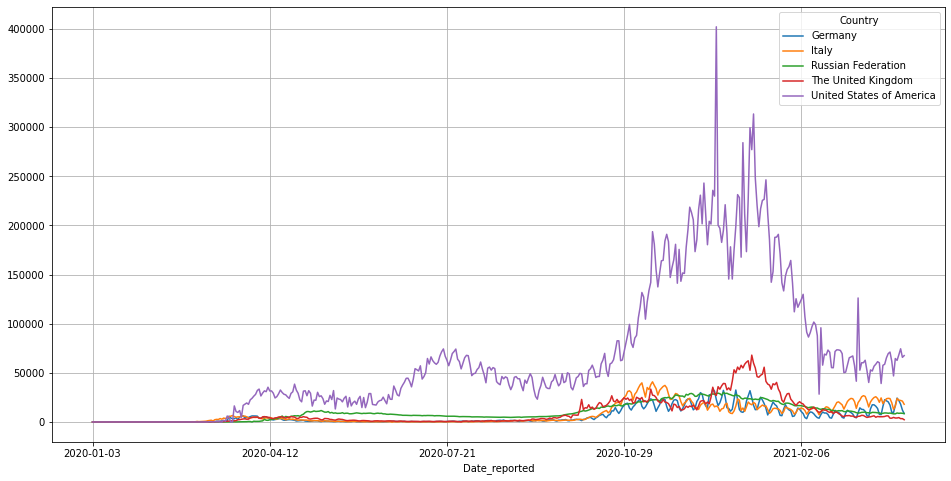

In [ ]:
compare_data = covid_data[(covid_data['Country'] == 'Italy') | (covid_data['Country'] == 'Russian Federation') |\
                         (covid_data['Country'] == 'Germany') | (covid_data['Country'] == 'The United Kingdom')|\
                         (covid_data['Country'] == 'United States of America')]
df = compare_data.pivot(index = 'Date_reported', values ='New_cases', columns = 'Country')
ax = df.plot(figsize=(16, 8), grid = True)

#fig, ax = plt.subplots()
#compare_data.groupby('Country').plot(x='Date_reported', y='New_cases', ax=ax, figsize=(16, 8), grid = True)
fig = ax.get_figure()
#fig.savefig('all.png', dpi = 150)

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
454,2021-04-01,62713
455,2021-04-02,68409
456,2021-04-03,74507
457,2021-04-04,65770


adf:  -1.5591002091839972
p-value:  0.5040994456581165
Critical values:  {'1%': -3.448544133483233, '5%': -2.8695574079525565, '10%': -2.5710411593052713}
есть единичные корни, ряд не стационарен
adf:  -4.529394107761122
p-value:  0.0001739406278619796
Critical values:  {'1%': -3.448645946352023, '5%': -2.869602139060357, '10%': -2.5710650077160495}
единичных корней нет, ряд стационарен


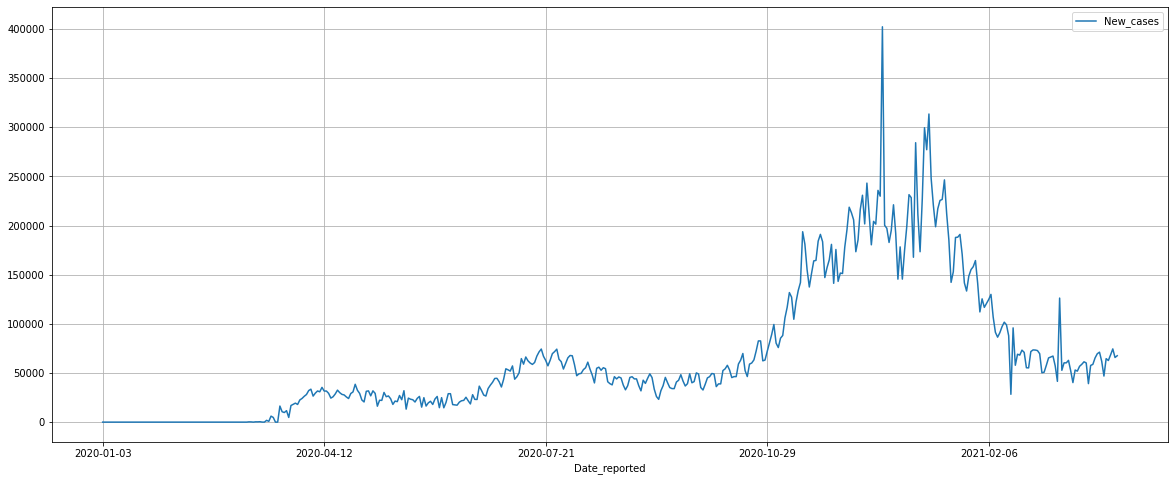

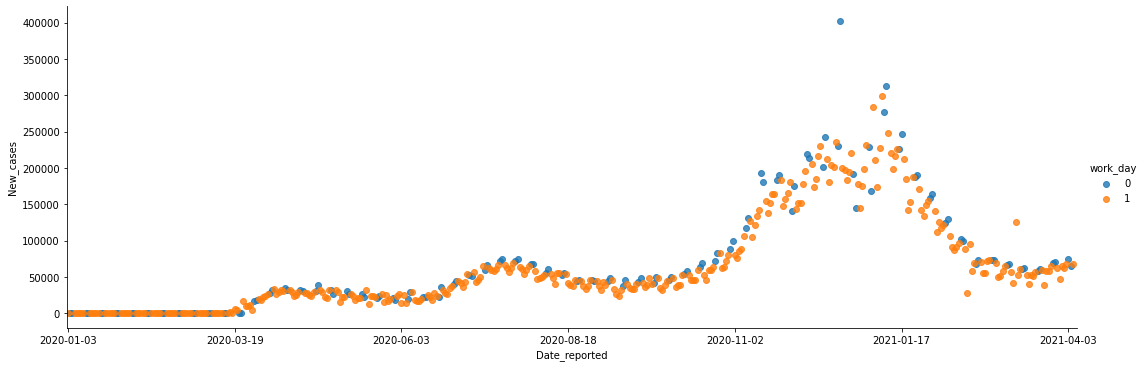

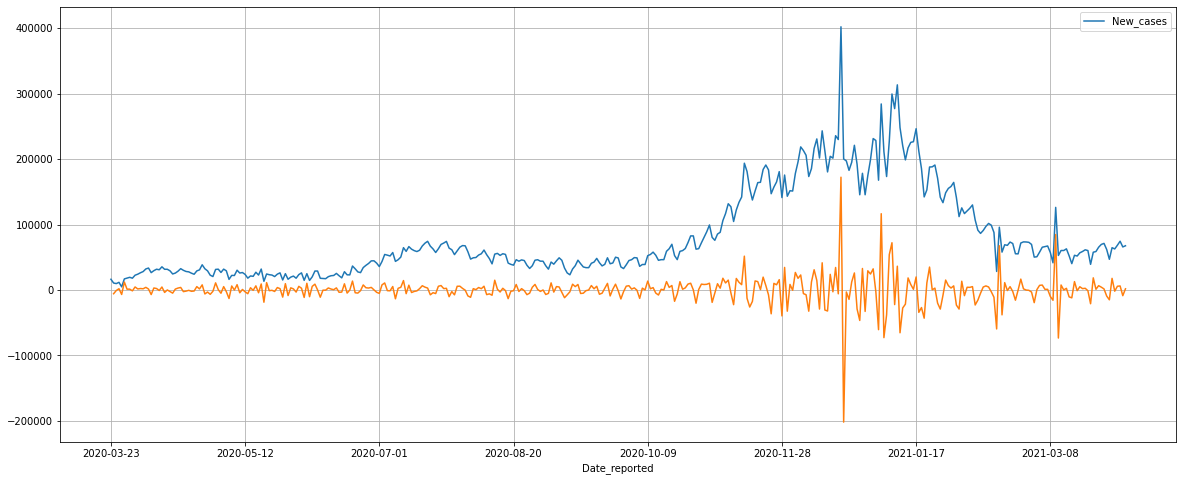

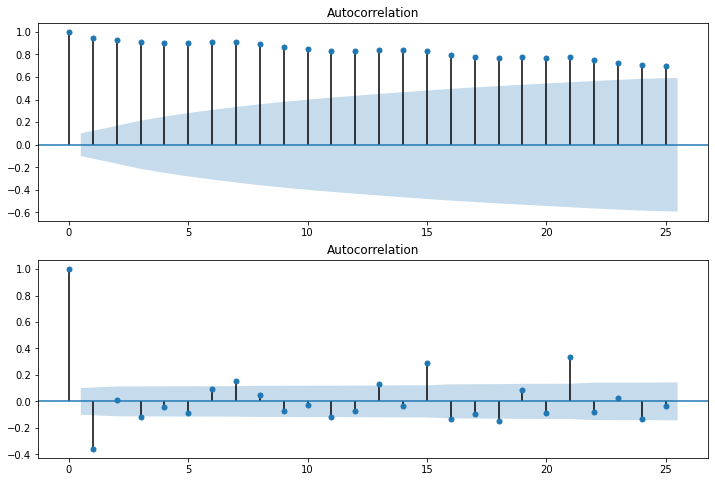

In [ ]:
form_country_plot(covid_data, 'United States of America')

,Date_reported,New_cases
0,2020-01-03,0
1,2020-01-04,0
2,2020-01-05,0
3,2020-01-06,0
4,2020-01-07,0
...,...,...
454,2021-04-01,24300
455,2021-04-02,21888
456,2021-04-03,18129
457,2021-04-04,12196


adf:  -1.3931390766459077
p-value:  0.5855608756681829
Critical values:  {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}
есть единичные корни, ряд не стационарен
adf:  -5.936884241915111
p-value:  2.3096575715450026e-07
Critical values:  {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}
единичных корней нет, ряд стационарен


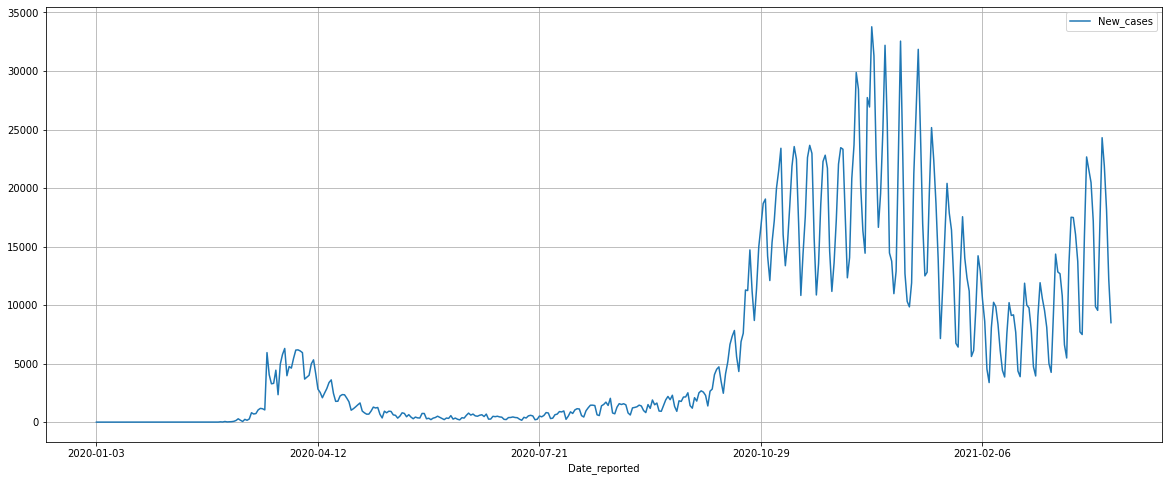

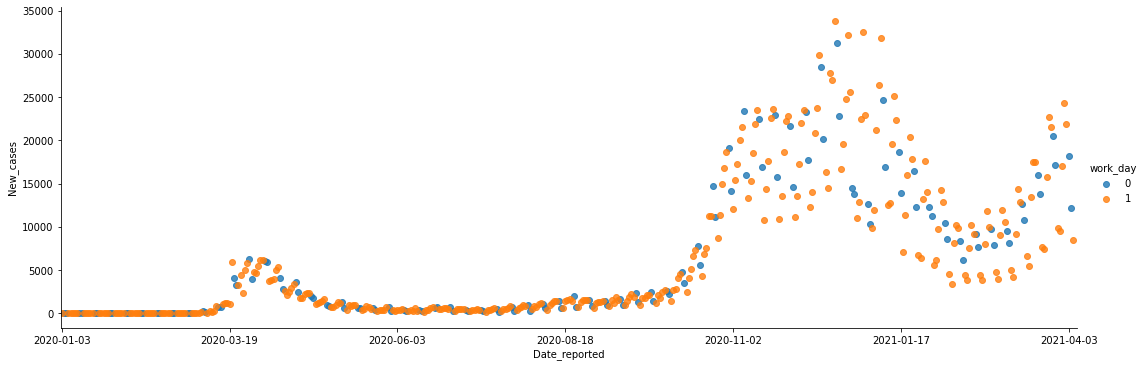

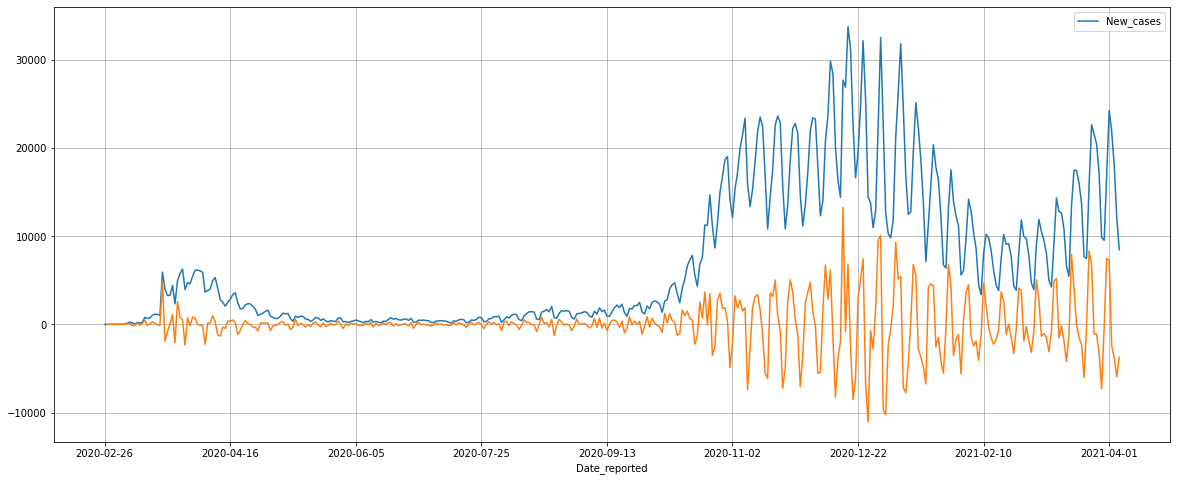

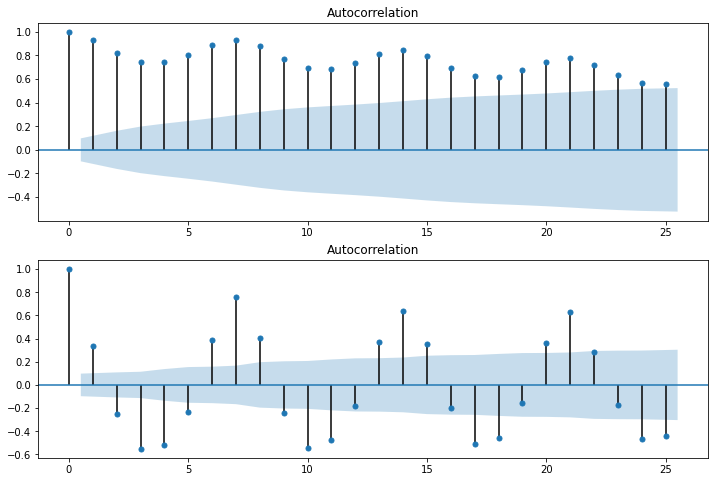

In [ ]:
form_country_plot(covid_data, 'Germany')

In [ ]:

# example of normalization
from sklearn.preprocessing import MinMaxScaler
from numpy import array


df = covid_data.copy()
Country = 'Germany'
country_df = df[df['Country'] == Country].reset_index(drop=True)
country_df = country_df[['Date_reported','New_cases']].copy()


def standardization(data, train_split = None, mean = 0, std = 1):
    if train_split is None:
        data_mean = mean
        data_std = std
    else:
        data_mean = data[:train_split].mean(axis=0)
        data_std = data[:train_split].std(axis=0)     
    return (data - data_mean) / data_std, data_mean, data_std

def inverse_standardization(data, mean, std):
    return data.copy() * std + mean  

def normalization(data, train_split = None, min = -1, max = 1 ):
    if train_split is None:
        data_min = min
        data_max = max
    else:
        data_min = data[:train_split].min(axis=0)
        data_max = data[:train_split].max(axis=0)            
    tmp = (data - data_min) / (data_max - data_min)
    return tmp * 2 - 1 , data_min, data_max

def inverse_normalization(data, data_min, data_max):
    tmp = (data + 1) / 2
    return tmp * (data_max - data_min) + data_min 


# create a differenced series
def difference(dataset, interval = 0):
    diff = list()
    if (interval == 0):
        return dataset
    
    for i in range(interval, len(dataset)):
		    value = dataset[i] - dataset[i - interval]
		    diff.append(value)
        
    return np.array(diff)
 
def Dickey_Fuller_test(data):
    test = sm.tsa.adfuller(data)
    print ('adf: ', test[0])
    print ('p-value: ', test[1])
    print ('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')
    return test    

def inverse_difference(diff_data, orig_data, interval = 0):
    if (interval == 0):
        return diff_data
    print(len(diff_data))
    print(len(orig_data))
    dataset = [diff_data[i] + orig_data[i] for i in range(0, len(diff_data))]
    return np.array(dataset)

def inverse_difference_pred(diff_data, orig, interval = 0):
    if (interval == 0):
        return diff_data

    dataset = np.zeros(len(diff_data))

    for i in range(0, interval):
        #diff_data[i] = diff_data[i] + orig[i]
        dataset[i] = diff_data[i] + orig[i]
        
    print(diff_data)

    for i in range(interval, len(diff_data)):
        #diff_data[i] = diff_data[i] + diff_data[i - interval]
        dataset[i] = diff_data[i] + dataset[i - interval] 

    return dataset

'''
country_df, drop_index = cut_first_null(country_df)
country_series = country_df['New_cases'].copy()
country_series.squeeze()
interval = 7
print(country_series[interval:])
country_diff = difference(country_series, interval = interval)

Dickey_Fuller_test(country_diff)
print(country_series[0:interval])            
country_diff = inverse_difference(country_diff, country_series, interval)
print(country_diff)
ax = country_diff.plot(y = 'New_cases', figsize=(20, 8), grid = 'True')
fig = ax.get_figure()
'''

"\ncountry_df, drop_index = cut_first_null(country_df)\ncountry_series = country_df['New_cases'].copy()\ncountry_series.squeeze()\ninterval = 7\nprint(country_series[interval:])\ncountry_diff = difference(country_series, interval = interval)\n\nDickey_Fuller_test(country_diff)\nprint(country_series[0:interval])            \ncountry_diff = inverse_difference(country_diff, country_series, interval)\nprint(country_diff)\nax = country_diff.plot(y = 'New_cases', figsize=(20, 8), grid = 'True')\nfig = ax.get_figure()\n"

adf:  -1.3931390766459077
p-value:  0.5855608756681829
Critical values:  {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}
есть единичные корни, ряд не стационарен
adf:  -5.936884241915111
p-value:  2.3096575715450026e-07
Critical values:  {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}
единичных корней нет, ряд стационарен


,Date_reported,New_cases
0,2020-02-26,2
1,2020-02-27,4
2,2020-02-28,26
3,2020-02-29,10
4,2020-03-01,54
...,...,...
400,2021-04-01,24300
401,2021-04-02,21888
402,2021-04-03,18129
403,2021-04-04,12196


0         2.0
1        22.0
2       -16.0
3        44.0
4       -36.0
        ...  
399    7249.0
400   -2412.0
401   -3759.0
402   -5933.0
403   -3699.0
Name: New_cases, Length: 404, dtype: float64


,New_cases,Date_reported
0,2.0,2020-02-27
1,22.0,2020-02-28
2,-16.0,2020-02-29
3,44.0,2020-03-01
4,-36.0,2020-03-02
...,...,...
399,7249.0,2021-04-01
400,-2412.0,2021-04-02
401,-3759.0,2021-04-03
402,-5933.0,2021-04-04


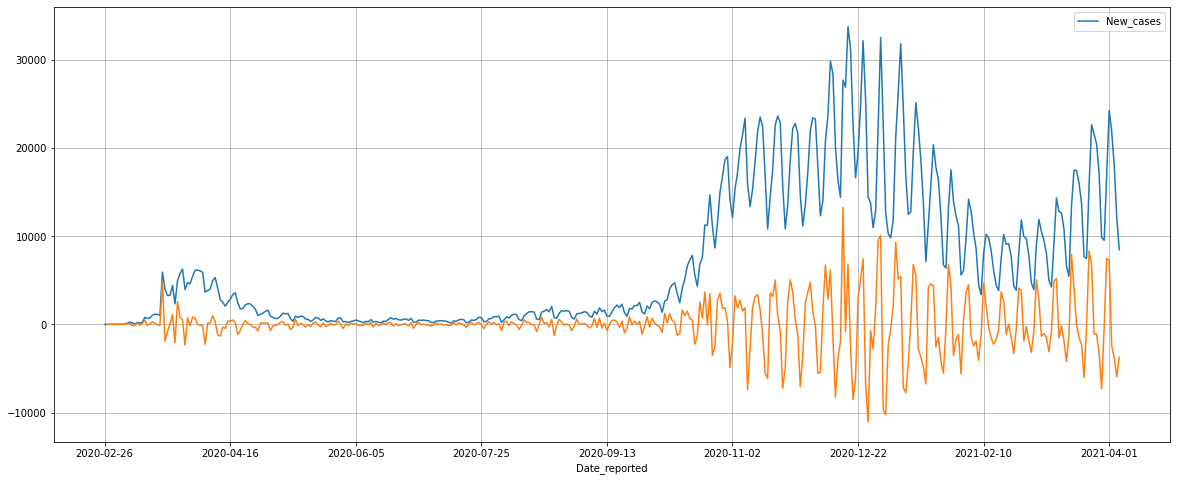

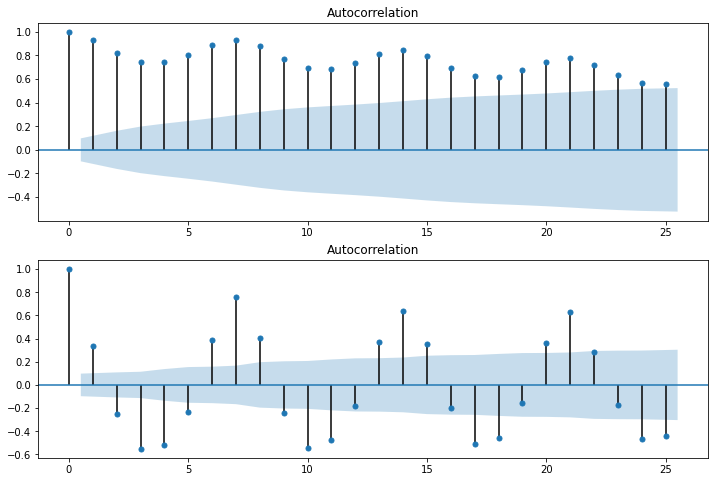

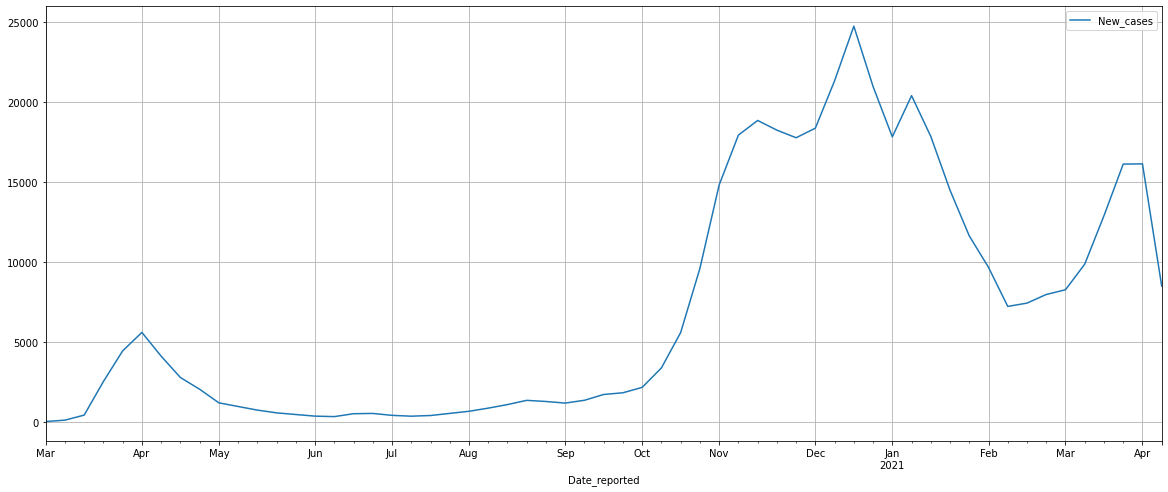

In [ ]:
#Week visualisation


df = covid_data.copy()
Country = 'Germany'
country_df = df[df['Country'] == Country].reset_index(drop=True)
country_df = country_df[['Date_reported','New_cases']].copy()

    
country_df, last_null = cut_first_null(country_df)

date_series = pd.date_range(country_df.iloc[1]['Date_reported'], periods= len(country_df.index) - 1, freq="D")

ax = country_df.plot(x = 'Date_reported', y = 'New_cases', figsize=(20, 8), grid = 'True')
fig = ax.get_figure()

country_diff = differentiation_country(country_df)
country_diff = country_diff.reset_index(drop = True)
display(country_df)
print(country_diff)

country_df = country_df.set_index(country_df['Date_reported'])
country_df = country_df.drop(['Date_reported'], axis=1)
#display(country_df)
country_df.index = pd.to_datetime(country_df.index)

week_country_df = country_df.copy().resample('W').mean()
#display(week_country_df)
ax = week_country_df.plot(y = 'New_cases', figsize=(20, 8), grid = 'True')
fig = ax.get_figure()



#print(date_series)
date_series = date_series.to_series(index = range(len(date_series)))
date_series = pd.Series(date_series, name = 'Date_reported')
#display(date_series)
country_diff = pd.concat([country_diff, date_series], axis=1)
display(country_diff)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import array



# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)  

def country_to_series_numpy(covid_data, country):
    country_df = covid_data[covid_data['Country'] == country].reset_index(drop=True)
    country_df = country_df[['Date_reported','New_cases']].copy()
    country_df, drop_index = cut_first_null(country_df)
    country_series = country_df['New_cases'].copy()
    country_series.squeeze()
    data = country_series.to_numpy(np.float64, copy = True)
    return data, country_df, drop_index


def data_preprocess(data, split_fraction, interval = 0, control_number = 4, \
                    norm = False, standart = False, diff = False):
  
    Dickey_Fuller_test(data)

    training_mean = -1
    training_std = -1
    data_min = -1
    data_max = -1

    if(diff):
        data = difference(data, interval)
    Dickey_Fuller_test(data)    

    control_data = data[-delay * control_number : len(data)]
    data = data[0 : -delay * control_number]
    TRAIN_END = int(split_fraction * int(data.shape[0]))

    if(standart):
         data, training_mean, training_std = standardization(data, TRAIN_END)
         control_data, a, b = standardization(control_data, mean = training_mean, std = training_std)

    if(norm):
         data, data_min, data_max = normalization(data, TRAIN_END)
         control_data, a, b = normalization(control_data, None, data_min, data_max)

    return data, control_data, training_mean, training_std, data_min, data_max, TRAIN_END     
    
'''
def cut_last_month(covid_data, country, delay, number):
    country_df = covid_data[covid_data['Country'] == country].reset_index(drop=True)
    country_df = country_df[['Date_reported','New_cases']].copy()
    country_df, drop_index = cut_first_null(country_df)
    country_series = country_df['New_cases'].copy()
    print(country_series.shape)
    print(type(country_series))
    control_data = country_series.iloc[-delay * number : len(country_series)]
    country_series = country_series.iloc[ 0 : -delay * number] 
    country_series.squeeze()
    data = country_series.to_numpy(np.float64, copy = True)
    return data, drop_index, control_data

def get_stationary_data (covid_data, country, delay, number):
    country_df = covid_data[covid_data['Country'] == country].reset_index(drop=True)
    country_df = country_df[['Date_reported','New_cases']].copy()
    country_df, drop_index = cut_first_null(country_df)
    country_diff = differentiation_country(country_df)
    print('hui',country_diff.shape)
    print(type(country_diff))
    #country_diff = country_diff['New_cases'].copy() 
    print('penis')
    print(country_diff.shape)
    print('penis')
    country_diff = country_diff.reset_index(drop = True)
    control_data = country_diff.iloc[-delay * number : len(country_diff)]
    country_diff = country_diff.iloc[0 : -delay * number]
    data = country_diff.to_numpy(np.float64, copy = True)
    return data, country_df, drop_index, control_data

def get_normal_stationary_data (covid_data, country, delay, number, train_split):
    country_df = covid_data[covid_data['Country'] == country].reset_index(drop=True)
    country_df = country_df[['Date_reported','New_cases']].copy()
    country_df, drop_index = cut_first_null(country_df)

    series_unnorm = country_df['New_cases'].copy()
    series_unnorm = series_unnorm.to_numpy(np.float64, copy = True)
    series_unnorm, mean, std = normalize(series_unnorm, train_split)
    
    saved_country_df = country_df.copy()

    country_df['New_cases'] = pd.Series(series_unnorm)
    

    country_diff = differentiation_country(country_df)
    country_diff = country_diff.reset_index(drop = True)
    control_data = country_diff.iloc[-delay * number : len(country_diff)]
    country_diff = country_diff.iloc[0 : -delay * number]
    data = country_diff.to_numpy(np.float64, copy = True)
    return data, saved_country_df, drop_index, control_data, mean, std 

'''       

"\ndef cut_last_month(covid_data, country, delay, number):\n    country_df = covid_data[covid_data['Country'] == country].reset_index(drop=True)\n    country_df = country_df[['Date_reported','New_cases']].copy()\n    country_df, drop_index = cut_first_null(country_df)\n    country_series = country_df['New_cases'].copy()\n    print(country_series.shape)\n    print(type(country_series))\n    control_data = country_series.iloc[-delay * number : len(country_series)]\n    country_series = country_series.iloc[ 0 : -delay * number] \n    country_series.squeeze()\n    data = country_series.to_numpy(np.float64, copy = True)\n    return data, drop_index, control_data\n\ndef get_stationary_data (covid_data, country, delay, number):\n    country_df = covid_data[covid_data['Country'] == country].reset_index(drop=True)\n    country_df = country_df[['Date_reported','New_cases']].copy()\n    country_df, drop_index = cut_first_null(country_df)\n    country_diff = differentiation_country(country_df)\n  

array([2.0000e+00, 4.0000e+00, 2.6000e+01, 1.0000e+01, 5.4000e+01,
       1.8000e+01, 2.8000e+01, 3.9000e+01, 6.6000e+01, 1.3800e+02,
       2.8400e+02, 1.6300e+02, 5.5000e+01, 2.3700e+02, 1.5700e+02,
       2.7100e+02, 8.0200e+02, 6.9300e+02, 7.3300e+02, 1.0430e+03,
       1.1740e+03, 1.1440e+03, 1.0420e+03, 5.9400e+03, 4.0490e+03,
       3.2760e+03, 3.3110e+03, 4.4380e+03, 2.3420e+03, 4.9540e+03,
       5.7800e+03, 6.2940e+03, 3.9650e+03, 4.7510e+03, 4.6150e+03,
       5.4530e+03, 6.1560e+03, 6.1740e+03, 6.0820e+03, 5.9360e+03,
       3.6770e+03, 3.8340e+03, 4.0030e+03, 4.9740e+03, 5.3230e+03,
       4.1330e+03, 2.8210e+03, 2.5370e+03, 2.0820e+03, 2.4860e+03,
       2.8660e+03, 3.3800e+03, 3.6090e+03, 2.4580e+03, 1.7750e+03,
       1.7850e+03, 2.2370e+03, 2.3520e+03, 2.3370e+03, 2.0550e+03,
       1.7370e+03, 1.0180e+03, 1.1440e+03, 1.3040e+03, 1.4780e+03,
       1.6390e+03, 9.4500e+02, 7.9300e+02, 6.7900e+02, 6.8500e+02,
       9.4700e+02, 1.2840e+03, 1.2090e+03, 1.2510e+03, 6.6700e

,Date_reported,New_cases
0,2020-02-26,2
1,2020-02-27,4
2,2020-02-28,26
3,2020-02-29,10
4,2020-03-01,54
...,...,...
400,2021-04-01,24300
401,2021-04-02,21888
402,2021-04-03,18129
403,2021-04-04,12196


adf:  -1.3931390766459077
p-value:  0.5855608756681829
Critical values:  {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}
есть единичные корни, ряд не стационарен
adf:  -5.936884241915111
p-value:  2.3096575715450026e-07
Critical values:  {'1%': -3.4469717056192213, '5%': -2.868866381945153, '10%': -2.570672761197837}
единичных корней нет, ряд стационарен
[-0.21823597 -0.21640321 -0.21988545 -0.21438717 -0.22171821 -0.21750286
 -0.21741123 -0.21594502 -0.21182131 -0.20504009 -0.22950745 -0.22831615
 -0.20174112 -0.22575029 -0.20797251 -0.16975945 -0.22840779 -0.21475372
 -0.19001145 -0.20641466 -0.22116838 -0.22776632  0.23042383 -0.39170676
 -0.28925544 -0.21521191 -0.11514318 -0.41049255  0.02093929 -0.14272623
 -0.1713173  -0.43184422 -0.14639175 -0.23088202 -0.14162658 -0.15399771
 -0.21676976 -0.22684994 -0.2317984  -0.42542955 -0.20403207 -0.20293242
 -0.12943872 -0.18643757 -0.3274685  -0.33864834 -0.24444444 -0.26011455
 -0.18139748 -0.18359679 -

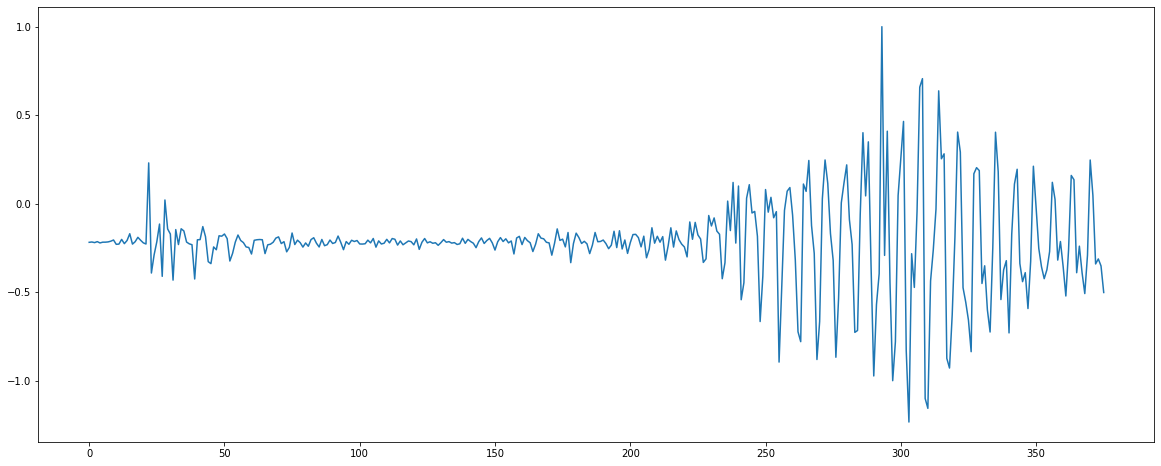

In [ ]:
#############  MachineLearning part
Country2 = 'Germany'
Country1 = 'United States of America'
Country = Country2


LSTM_flag = False

# setting hyperparameters
split_fraction = 0.8
step = 1       # шаг отбора образцов из наблюдений (то есть на вход дается наблюдение раз step дней из 28 предыдущих)
lookback = 28   # кол-во наблюдений за предыдущие 4 недели (past in keras guide)
delay = 7       # цель = заболеваемость на в следующие 7 дней (future in keras guide)
n_features = 1
learning_rate = 0.0001
batch_size = 1
epochs = 10
unit_count = 16


control_number = 4

diff = True
interval = 1
standart = True
norm = True
#diff = True
#interval = 1

#standart = False
#norm = True

# conversion from DataFrame to np.ndarray
#data, country_df, drop_index = country_to_numpy(covid_data, Country)
#data, drop_index, control_data = cut_last_month(covid_data, Country, delay, number)
data, country_df, drop_index = country_to_series_numpy(covid_data, Country)

#for stationarity 
#data, country_df, drop_index, control_data = get_stationary_data(covid_data, Country, delay, number)
display(data)
display(country_df)


#TRAIN_END = int(split_fraction * int(data.shape[0]))

data, control_data, mean, std, data_min, data_max, TRAIN_END = data_preprocess(data, \
                                                          split_fraction, \
                                                          interval, \
                                                          control_number, \
                                                          norm, \
                                                          standart, \
                                                          diff)
print(data)
print(control_data)
#data, country_df, drop_index, control_data, mean, std = get_normal_stationary_data(covid_data, Country, delay, number, TRAIN_END)

#TRAIN_END = len(data) - len(data)//10
#data, mean, std = normalize(data, TRAIN_END)

fig = plt.figure(figsize=(20,8))
ax = pd.Series(data).plot()
#data.shape[-1]   # one before last dimension of array

hyperparameters = pd.Series([unit_count, lookback, delay, n_features, learning_rate, mean, std, batch_size],\
                  index = ['unit count', 'lookback', 'prediction length',  \
                           'dimension of input timeseries', 'learning rate', \
                           'mean', 'std', 'batch_size'])
LSTM = "LSTM_"
GRU = "GRU_"

if (LSTM_flag):
    GRU = LSTM

log_path = GRU + "log.csv"
path_checkpoint = GRU + str(unit_count) + "unit_" + str(learning_rate) + "rate_" + str(lookback) + "lookback_" + str(split_fraction) +"split.h5"
loss_path = GRU + '_Model_loss' + Country + '.png'

train_data = data[0 : TRAIN_END]  #TRAIN_END - не включается
val_data = data[TRAIN_END:]
#control_data = (control_data - mean)/std 
print(mean)
print(std)
print(data_min)
print(data_max)
print(train_data.shape)
print(val_data.shape)
#display(train_data)

In [ ]:
###################         working now

# multi-step data preparation

# split into samples
X, y = split_sequence(train_data.copy(), lookback, delay)

# reshape from [samples, timesteps] into [samples, timesteps, features]
X = X.reshape((X.shape[0], X.shape[1], n_features))
#y = y.reshape((y.shape[0], y.shape[1], n_features))
print("Input train shape:", X.shape)
print("Target train shape:", y.shape)


# validation_dataset
val_data_X, val_data_Y = split_sequence(val_data.copy(), lookback, delay)

# reshape from [samples, timesteps] into [samples, timesteps, features]
val_data_X = val_data_X.reshape((val_data_X.shape[0], val_data_X.shape[1], n_features))
#val_data_Y = val_data_Y.reshape((val_data_Y.shape[0], val_data_Y.shape[1], n_features))
print("Input validation shape:", val_data_X.shape)
print("Target validation shape:", val_data_Y.shape)

loss = 'mae'
loss = 'mse'


Input train shape: (266, 28, 1)
Target train shape: (266, 7)
Input validation shape: (42, 28, 1)
Target validation shape: (42, 7)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

inputs = keras.layers.Input(shape=(X.shape[1], X.shape[2]))
lstm_out = keras.layers.LSTM(unit_count)(inputs)
outputs = keras.layers.Dense(y.shape[1])(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss)
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 1)]           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_8 (Dense)              (None, 7)                 455       
Total params: 17,351
Trainable params: 17,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

inputs = keras.layers.Input(shape=(X.shape[1], X.shape[2]))
gru_out = keras.layers.GRU(unit_count)(inputs)
outputs = keras.layers.Dense(y.shape[1])(gru_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 1)]           0         
_________________________________________________________________
gru (GRU)                    (None, 16)                912       
_________________________________________________________________
dense (Dense)                (None, 7)                 119       
Total params: 1,031
Trainable params: 1,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

inputs = keras.layers.Input(shape=(X.shape[1], X.shape[2]))
gru_out = keras.layers.GRU(unit_count)(inputs)
outputs = keras.layers.Dense(y.shape[1])(gru_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=loss)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 1)]           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                12864     
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 455       
Total params: 13,319
Trainable params: 13,319
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#log_path = GRU + "log.csv"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=75)

csv_logger = tf.keras.callbacks.CSVLogger(log_path, separator=";", append=False)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    X, y,
    epochs=150,
    batch_size = batch_size,
    validation_data= (val_data_X, val_data_Y),
    callbacks=[es_callback, modelckpt_callback, csv_logger],
)

#path = 'model_1'
#model.save(path)

Epoch 1/150
266/266 [==============================] - 4s 9ms/step - loss: 0.0775 - val_loss: 0.1019

Epoch 00001: val_loss improved from inf to 0.10186, saving model to GRU_16unit_0.0001rate_28lookback_0.8split.h5
Epoch 2/150
266/266 [==============================] - 1s 5ms/step - loss: 0.0544 - val_loss: 0.0815

Epoch 00002: val_loss improved from 0.10186 to 0.08145, saving model to GRU_16unit_0.0001rate_28lookback_0.8split.h5
Epoch 3/150
266/266 [==============================] - 1s 5ms/step - loss: 0.0291 - val_loss: 0.0762

Epoch 00003: val_loss improved from 0.08145 to 0.07625, saving model to GRU_16unit_0.0001rate_28lookback_0.8split.h5
Epoch 4/150
266/266 [==============================] - 1s 6ms/step - loss: 0.0396 - val_loss: 0.0749

Epoch 00004: val_loss improved from 0.07625 to 0.07489, saving model to GRU_16unit_0.0001rate_28lookback_0.8split.h5
Epoch 5/150
266/266 [==============================] - 1s 5ms/step - loss: 0.0448 - val_loss: 0.0738

Epoch 00005: val_loss impr

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


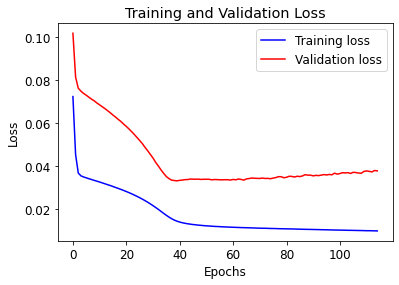

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

mpl.rc('font', **font)

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    fig = plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return fig

fig = visualize_loss(history, "Training and Validation Loss")
fig.savefig(loss_path, dpi = 150)

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GRU_64unit_0.0001rate_28lookback_0.8split.h5 to GRU_64unit_0.0001rate_28lookback_0.8split.h5
User uploaded file "GRU_64unit_0.0001rate_28lookback_0.8split.h5" with length 68728 bytes


In [ ]:
#country_df
path_checkpoint = GRU + "64unit_0.0001rate_28lookback_0.8split.h5"
log_path = GRU + "log.csv"

# Load the model
#model = tf.keras.models.load_model(filepath, compile = True)
model.load_weights(path_checkpoint)


'\nval_data_for_predictions = val_data[-lookback:] \n# A few random samples\n#use_samples = val_data_for_predictions[0]\n#samples_to_predict = []\nval_data_for_predictions = np.array(val_data_for_predictions)\n# Convert into Numpy array\nsamples_to_predict = val_data_for_predictions.reshape((1, n_steps_in, n_features))\n\n# Generate predictions for samples\npredictions = model.predict(samples_to_predict)\nprint(predictions)\n\nresult = np.array(predictions.ravel())\n'

In [ ]:
"""
n = 25
while n > 0:
    samples_to_predict = samples_to_predict.ravel()
    samples_to_predict = samples_to_predict[n_steps_out:]
    samples_to_predict = np.concatenate((samples_to_predict.ravel(), predictions.ravel()))
    samples_to_predict = samples_to_predict.reshape((1, n_steps_in, n_features))
    predictions = model.predict(samples_to_predict)
    result = np.concatenate((result, predictions.ravel()))
    n = n - 1
    

In [ ]:
def control_loss_counter(val_data, control_data, lookback, delay, n_features, model):
    iter = len(control_data) - delay
    data_for_predictions = np.concatenate((val_data[-lookback:], control_data))
    residual = []
    mse = tf.keras.losses.MeanSquaredError()
    for i in range(0, iter):
        samples_to_predict = data_for_predictions[i : lookback + i]
        samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
        predictions = model.predict(samples_to_predict)
        #print(predictions.ravel()) 
        truth = control_data[i: delay + i]
        #print(truth)
        residual.append(mse(predictions.ravel(), truth))
    #print(len(residual))
    return pd.Series(residual).mean(axis = 0)    

def actual_loss_counter(val_data, control_data, lookback, delay, n_features, model):
    iter = len(control_data) - delay
    mse = tf.keras.losses.MeanSquaredError()
    length = iter//delay

    result = make_pred(val_data, model, delay, lookback, length = length + 1)

    '''
    samples_to_predict = val_data[-lookback:]
    samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
    predictions = model.predict(samples_to_predict)
    result = predictions.ravel()

    for i in range(0, iter, delay):
        samples_to_predict = samples_to_predict.ravel()
        samples_to_predict = samples_to_predict[delay:]
        samples_to_predict = np.concatenate((samples_to_predict, predictions.ravel()))
        samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
        predictions = model.predict(samples_to_predict)
        result = np.concatenate((result, predictions.ravel()))
    '''        
    print(len(result))
    print(len(control_data))
    return mse(result, control_data).numpy()   

def actual_residual_counter(prediction, control_data):
    mse = tf.keras.losses.MeanSquaredError()
    return mse(prediction, control_data).numpy() 


def make_pred(data, model, delay, lookback, n_features = 1, length = 5):

    samples_to_predict = data[-lookback:]
    samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
    predictions = model.predict(samples_to_predict)
    result = predictions.ravel()

    for i in range(length - 1):
        samples_to_predict = samples_to_predict.ravel()
        samples_to_predict = samples_to_predict[delay:]
        samples_to_predict = np.concatenate((samples_to_predict, predictions.ravel()))
        samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
        predictions = model.predict(samples_to_predict)
        result = np.concatenate((result, predictions.ravel()))

    return result      
    
def make_pred_using_control(val_data, control_data, model, delay, lookback,\
                            n_features = 1, control_number = 4):
    data_for_predictions = np.concatenate((val_data[-lookback:], control_data))
    print(len(data_for_predictions))
    print(len(control_data))
    control_res = np.array([])
    for i in range(control_number + 1):
        samples_to_predict = data_for_predictions[i*delay : lookback + i*delay]
        samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
        predictions = model.predict(samples_to_predict)
        control_res = np.concatenate((control_res, predictions.ravel()))

    return control_res

In [ ]:
# part for cheating predictions
checking_part = 210
n = checking_part // delay
data_for_predictions = data[- (checking_part + lookback) :]
print("len of previos data:", len(data_for_predictions))
result = np.array([])
 
train_res = np.array([])
val_res = np.array([])
control_res = np.array([])

for i in range(0, checking_part, delay):
    samples_to_predict = data_for_predictions[i : lookback + i]
    samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
    predictions = model.predict(samples_to_predict)
    result = np.concatenate((result, predictions.ravel()))
print("len of previos res:", len(result))

train_res = result[ : -len(val_data)]
val_res = result[-len(val_data) : ]


control_res = make_pred_using_control(val_data, control_data, model, delay, \
                                     lookback, n_features = 1, control_number = 4)

control_res_long = make_pred(val_data, model, delay, lookback)
'''
data_for_predictions = np.concatenate((val_data[-lookback:], control_data))
print(len(data_for_predictions))
print(len(control_data))
for i in range(control_number + 1):
    samples_to_predict = data_for_predictions[i*delay : lookback + i*delay]
    samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
    predictions = model.predict(samples_to_predict)
    control_res = np.concatenate((control_res, predictions.ravel()))

    
val_data_for_predictions = val_data[-lookback:]   
val_data_for_predictions = np.array(val_data_for_predictions)  
samples_to_predict = val_data_for_predictions.reshape((1, lookback, n_features))
predictions = model.predict(samples_to_predict)
result = np.concatenate((result, predictions.ravel()))

n = 25
while n > 0:
    samples_to_predict = samples_to_predict.ravel()
    samples_to_predict = samples_to_predict[delay:]
    samples_to_predict = np.concatenate((samples_to_predict.ravel(), predictions.ravel()))
    samples_to_predict = samples_to_predict.reshape((1, lookback, n_features))
    predictions = model.predict(samples_to_predict)
    result = np.concatenate((result, predictions.ravel()))
    n = n - 1
'''
print("len of res:", len(result))
print("len of train_res:", len(train_res))
print("len of val_res:", len(val_res)) 
print("len of control_res:", len(control_res))  
print("len of data:", len(data))
print("len of val_data:", len(val_data)) 

len of previos data: 238
len of previos res: 210
56
28
len of res: 210
len of train_res: 134
len of val_res: 76
len of control_res: 35
len of data: 376
len of val_data: 76


In [ ]:
def invert_operation_my(data, orig_data, interval = 0, control_number = 4, \
                    norm = False, standart = False, diff = False, \
                    mean = -1, std = -1, data_min = -1, data_max = -1 ):
    data_res = data.copy()
    if (norm):
        data_res = inverse_normalization(data, data_min, data_max)

    if (standart):
        data_res = inverse_standardization(data_res, mean, std)

    if (diff):
        data_res = inverse_difference(data_res, orig_data, interval)

    return data_res 

def invert_operation_kk(data, orig_data, interval = 0, control_number = 4, \
                    norm = False, standart = False, diff = False, \
                    mean = -1, std = -1, data_min = -1, data_max = -1 ):
    data_res = data.copy()
    if (norm):
        data_res = inverse_normalization(data, data_min, data_max)

    if (standart):
        data_res = inverse_standardization(data_res, mean, std)

    if (diff):
        data_res = inverse_difference_pred(data_res, orig_data, interval)

    return data_res 

In [ ]:
#print(val_res)
#tmp_train = train_data[-(len(train_res) + interval):]
#print(len(train_res))
#print(len(tmp_train))

country_original, a, b = country_to_series_numpy(covid_data, Country)
tmp_train = country_original[-(len(control_data) + checking_part + interval):]

train_res_inverted = invert_operation_my(train_res, tmp_train, \
                                interval, control_number, norm, standart, diff, \
                                mean, std, data_min, data_max)

tmp_val = country_original[-(len(control_data) + len(val_data) + interval):]
val_res_inverted = invert_operation_my(val_res, tmp_val, \
                                interval, control_number, norm, standart, diff, \
                                mean, std, data_min, data_max)
#print(val_res_inverted)

134
239
76
105


In [ ]:
#print(control_res)
tmp_val =  country_original[-(len(control_data) + interval):]
control_res_inv = invert_operation_my(control_res[:-delay], tmp_val, \
                                interval, control_number, norm, standart, diff, \
                                mean, std, data_min, data_max)

tmp_val =  country_original
temp_pred = invert_operation_kk(control_res[-delay:], tmp_val, \
                                interval, control_number, norm, standart, diff, \
                                mean, std, data_min, data_max)

control_res_inverted = np.concatenate((control_res_inv, temp_pred), axis = 0)

tmp_val = country_original[-(len(control_data) + interval):]
print(len(tmp_val))
print(len(control_res_long))
control_res_long_inverted = invert_operation_kk(control_res_long, tmp_val, \
                                interval, control_number, norm, standart, diff, \
                                mean, std, data_min, data_max)
#print(control_res_long)
#print(control_res_inverted)
#print(control_res_long_inverted)

28
29
[ 3397.09970318  4750.5619715   4407.22038849  1415.49648885
 -4393.3367283  -7049.20027488 -3506.59710699]
29
35
[ 1063.1001  2970.2556  3299.832   1464.654  -1570.9213 -3649.9785
 -2708.813   1547.2871  3539.1487  3717.6292  1624.7902 -2172.063
 -4542.866  -3026.8228  2134.0027  4073.8037  4063.0315  1629.5383
 -2827.6968 -5375.0723 -3265.323   2777.6433  4520.049   4300.0723
  1566.4619 -3541.8577 -6157.7227 -3366.3123  3431.5037  4854.047
  4423.407   1442.1108 -4281.212  -6844.203  -3322.867 ]


In [ ]:
random_loss = actual_residual_counter(control_res[: -delay], control_data)
print(random_loss) 

0.04486951231956482


In [ ]:
control_loss = control_loss_counter(val_data, control_data, lookback, delay, n_features, model)
print(control_loss)

0.046364759405454


In [ ]:
kk_loss = actual_loss_counter(val_data, control_data, lookback, delay, n_features, model)
print(kk_loss)

28
28
0.05293365567922592


In [ ]:
print(len(control_res_long), type(control_res_long))
print(len(control_res), type(control_res_long))
mae = tf.keras.losses.MeanAbsoluteError()

series = country_df['New_cases'].copy()
series = series.iloc[-(delay * control_number): len(series)].reset_index(drop = True)
print(len(series))
original_control_data = series.to_numpy()

pred_my = control_res_inverted[:-delay]
origin_residual_mae = mae(pred_my.astype(float), original_control_data.astype(float)).numpy()
origin_residual = np.square(pred_my - original_control_data).mean()

#print(origin_residual)
print(origin_residual_mae)
pred_kk = control_res_long_inverted[:-delay]
actual_residual_mae = mae(pred_kk.astype(float), original_control_data.astype(float)).numpy()
print(actual_residual_mae)
'''
pred_kk = control_res_long_inverted[:-delay]
actual_residual_mae = actual_residual_counter(pred_kk, original_control_data)
print(actual_residual)
'''

35 <class 'numpy.ndarray'>
35 <class 'numpy.ndarray'>
28
2020.5540771484375
2382.68408203125


'\npred_kk = control_res_long_inverted[:-delay]\nactual_residual_mae = actual_residual_counter(pred_kk, original_control_data)\nprint(actual_residual)\n'

In [ ]:
parameter = pd.read_csv(log_path, sep=';', encoding='utf-8')
learning_parameters = parameter.copy()
#pd.options.display.max_columns = None
print(learning_parameters.shape) 
learning_parameters.info()
#print(pd.DataFrame(data))

(115, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   epoch     115 non-null    int64  
 1   loss      115 non-null    float64
 2   val_loss  115 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [ ]:
hyperparameters_filename = 'hyperparameters.csv'
learning_parameters_filename = 'learning_parameters.csv'
learning_parameters = learning_parameters.iloc[learning_parameters['val_loss'].idxmin()]

#parameters = parameters.append(hyperparameters)
learning_parameters = learning_parameters.to_frame()
learning_parameters = learning_parameters.pivot_table(columns= learning_parameters.index)

learning_parameters['control_loss'] = [control_loss]
learning_parameters['using_origin_loss'] = [random_loss]
learning_parameters['not_using_origin_loss'] = [kk_loss]
learning_parameters['using_origin_residual_mae'] = [origin_residual_mae]
learning_parameters['not_using_origin_residual_mae'] = [actual_residual_mae]

learning_parameters['training mean'] = [mean]
learning_parameters['training std'] = [std]
learning_parameters['training min'] = [data_min]
learning_parameters['training max'] = [data_max]
learning_parameters['epoch'] = (learning_parameters['epoch'] + 1).astype('int')

print(learning_parameters)
learning_parameters.to_csv(learning_parameters_filename, sep = ';', float_format ='%.4f')

#parameters['epoch'] = parameters['epoch'].astype('int')
learning_parameters['dimension of input timeseries'] = hyperparameters['dimension of input timeseries'].astype('int')
learning_parameters['unit count'] = hyperparameters['unit count'].astype('int')
learning_parameters['lookback'] = hyperparameters['lookback'].astype('int')
learning_parameters['prediction length'] = hyperparameters['prediction length'].astype('int')
learning_parameters['batch_size'] = hyperparameters['batch_size'].astype('int')
learning_parameters['learning rate'] = hyperparameters['learning rate']
learning_parameters['differentiation'] = [diff]
learning_parameters['standardization'] = [standart]
learning_parameters['normalization'] = [norm]


learning_parameters.info()

learning_parameters.to_csv(hyperparameters_filename, sep = ';', float_format ='%.4f')

    epoch      loss  val_loss  ...  training std  training min  training max
39     40  0.014304  0.033109  ...   2053.539624     -4.185011      6.442979

[1 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 39 to 39
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   epoch                          1 non-null      int64  
 1   loss                           1 non-null      float64
 2   val_loss                       1 non-null      float64
 3   control_loss                   1 non-null      float64
 4   using_origin_loss              1 non-null      float64
 5   not_using_origin_loss          1 non-null      float64
 6   using_origin_residual_mae      1 non-null      float64
 7   not_using_origin_residual_mae  1 non-null      float64
 8   training mean                  1 non-null      float64
 9   training std                   1 non-null      float64


376


,результат на тренировочных данных,результат на проверочных данных,прогноз c использованием контрольных данных,прогноз,кол-во заболевших в день
0,NaN,NaN,NaN,NaN,2.0
1,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,26.0
3,NaN,NaN,NaN,NaN,10.0
4,NaN,NaN,NaN,NaN,54.0
...,...,...,...,...,...
407,NaN,NaN,12556.882063,19805.807861,NaN
408,NaN,NaN,13972.378552,21247.918701,NaN
409,NaN,NaN,9579.041824,16966.706787,NaN
410,NaN,NaN,2529.841549,10122.503662,NaN


,результат на тренировочных данных,результат на проверочных данных,прогноз c использованием контрольных данных,прогноз,кол-во заболевших в день,Дата
0,NaN,NaN,NaN,NaN,2.0,2020-02-26
1,NaN,NaN,NaN,NaN,4.0,2020-02-27
2,NaN,NaN,NaN,NaN,26.0,2020-02-28
3,NaN,NaN,NaN,NaN,10.0,2020-02-29
4,NaN,NaN,NaN,NaN,54.0,2020-03-01
...,...,...,...,...,...,...
435,NaN,NaN,NaN,NaN,NaN,2021-05-06
436,NaN,NaN,NaN,NaN,NaN,2021-05-07
437,NaN,NaN,NaN,NaN,NaN,2021-05-08
438,NaN,NaN,NaN,NaN,NaN,2021-05-09


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


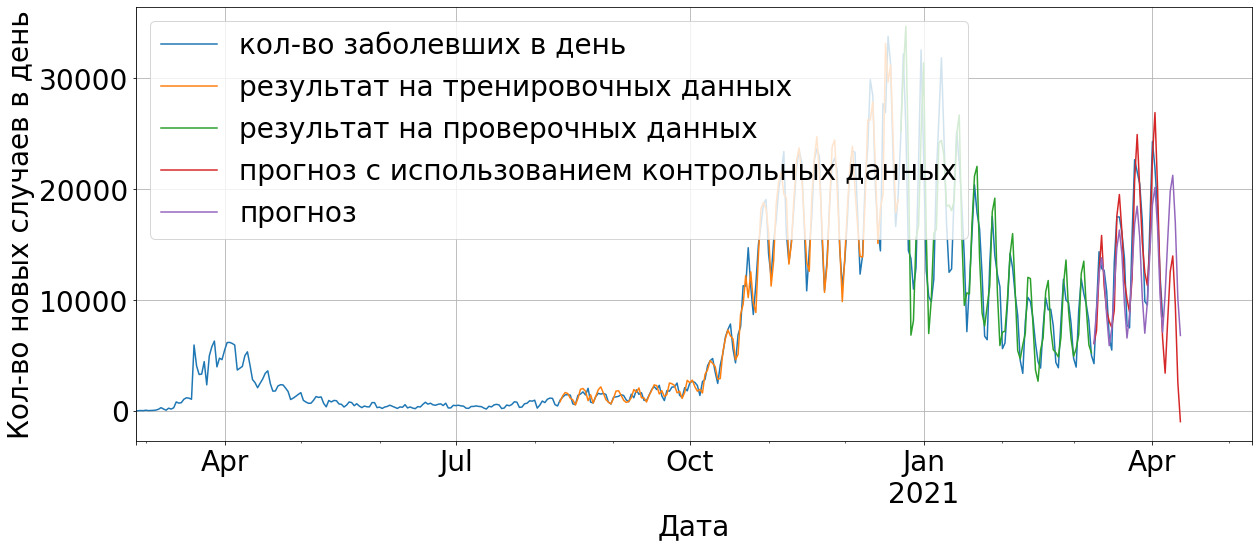

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

mpl.rc('font', **font)
#plt.tight_layout()

#visual_prediction = np.empty(len(data) - len(data_for_predictions) + lookback)
#visual_prediction = np.empty(len(data) - checking_part)
#visual_prediction[:] = np.nan

visual_train = np.empty(len(data) - checking_part + interval)
visual_val = np.empty(len(data) + len(train_res) - checking_part + interval)
visual_control = np.empty(len(data) + interval)
visual_train[:] = np.nan
visual_val[:] = np.nan
visual_control[:] = np.nan

print(len(data))

#visual_prediction = np.concatenate((visual_prediction, result))

visual_train = np.concatenate((visual_train, train_res_inverted))
visual_val = np.concatenate((visual_val, val_res_inverted))
visual_control_long = np.concatenate((visual_control, control_res_long_inverted))
visual_control = np.concatenate((visual_control, control_res_inverted))

#visual_prediction = pd.Series(visual_prediction, name='prediction')
#visual_prediction = unnormalize(visual_prediction, mean, std)

visual_train = pd.Series(visual_train, name='результат на тренировочных данных')
visual_val = pd.Series(visual_val, name='результат на проверочных данных')
visual_control = pd.Series(visual_control, name='прогноз c использованием контрольных данных')
visual_control_long = pd.Series(visual_control_long, name='прогноз')

#visual_train = unnormalize(visual_train, mean, std)
#visual_val = unnormalize(visual_val, mean, std)
#visual_control = unnormalize(visual_control, mean, std)



#print(visual_prediction)
df_fin = pd.Series(data = country_df['New_cases'], name = 'кол-во заболевших в день')
#country_df = country_df.rename(columns = {'New_cases': 'кол-во заболевших в день'})
#df_fin['кол-во заболевших в день'] = country_df['кол-во заболевших в день'].copy()

#print(country_df)
#print(visual_train)
#print(visual_val)
#print(visual_control)

#df = pd.concat([visual_prediction, country_df], axis=1)
#df = pd.concat([visual_train, visual_val, visual_control, country_df], axis=1)
df = pd.concat([visual_train, visual_val, visual_control, visual_control_long, df_fin], axis=1)

display(df)

date_series = pd.date_range(country_df.iloc[0]['Date_reported'], periods= len(df.index) + lookback, freq="D")
#print(date_series)
date_series = date_series.to_series(index = range(len(date_series)))
date_series = pd.Series(date_series, name = 'Дата')
#display(date_series)
df = pd.concat([df, date_series], axis=1)
display(df)


ax = df.plot(x = 'Дата', y = ['кол-во заболевших в день', 'результат на тренировочных данных', 'результат на проверочных данных','прогноз c использованием контрольных данных', 'прогноз'],figsize=(20, 8), grid = 'True')
ax.set_ylabel('Кол-во новых случаев в день')
fig = ax.get_figure()
visualizaton_path = Country + '_Prediction' + '.png' 
fig.savefig(visualizaton_path, dpi = 150, bbox_inches = "tight")

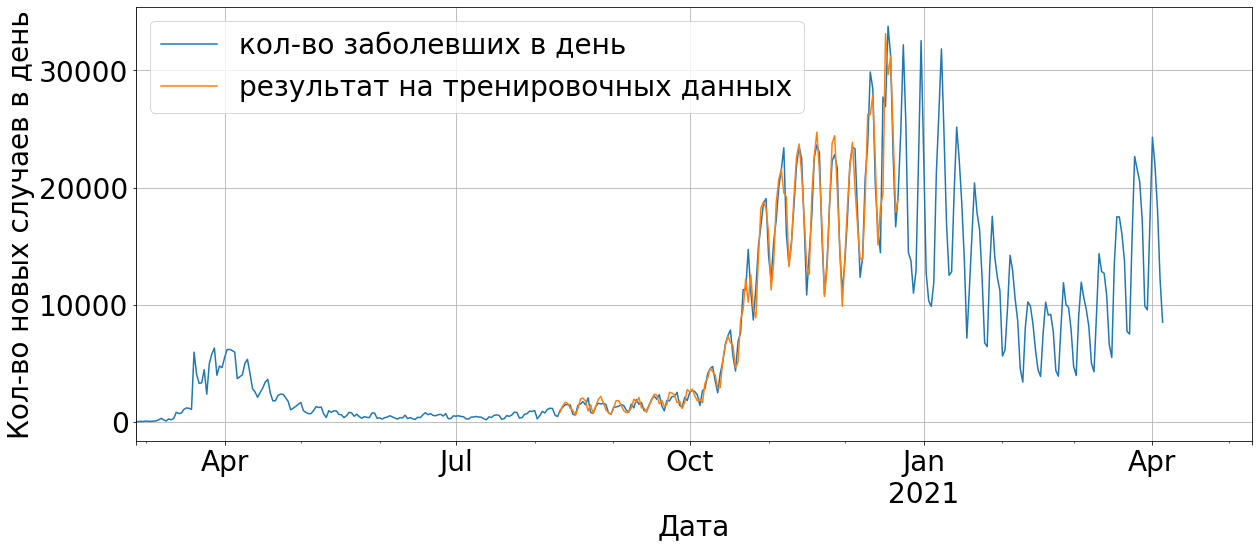

In [ ]:

train_data_visual_path = 'train_data.png'
ax = df.plot(x = 'Дата', y = ['кол-во заболевших в день', 'результат на тренировочных данных'],figsize=(20, 8), grid = 'True')
ax.set_ylabel('Кол-во новых случаев в день')
fig = ax.get_figure()
visualizaton_path = Country + '_Prediction' + '.png' 

fig.savefig(train_data_visual_path, dpi = 150, bbox_inches = "tight")

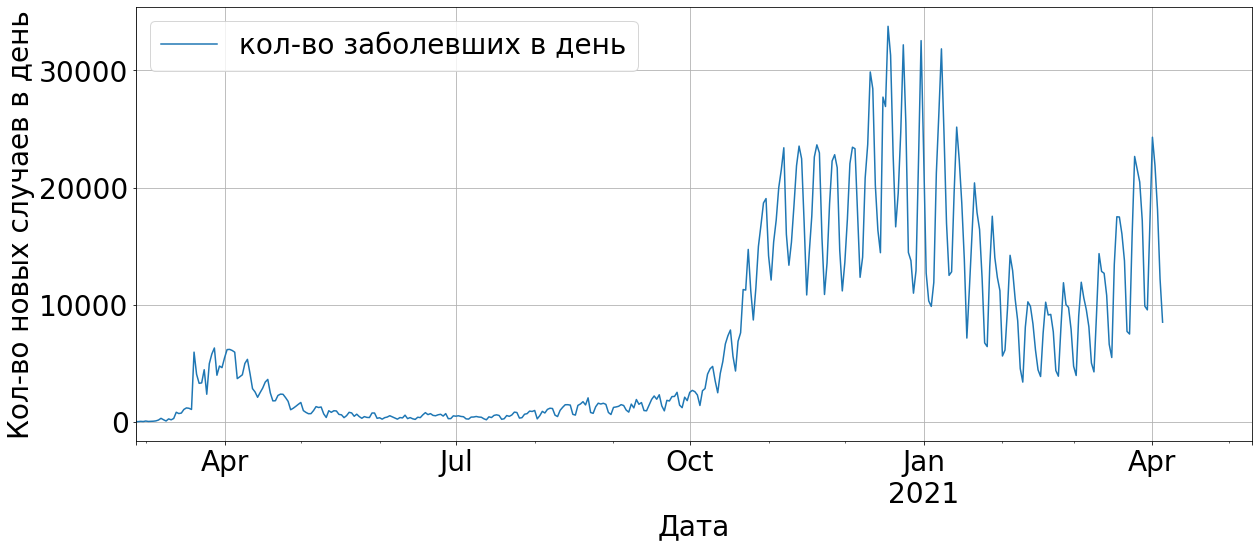

In [ ]:
raw_data_visual_path = 'raw_data.png'
ax = df.plot(x = 'Дата', y = ['кол-во заболевших в день'],figsize=(20, 8), grid = 'True')
ax.set_ylabel('Кол-во новых случаев в день')
fig = ax.get_figure()
visualizaton_path = Country + '_Prediction' + '.png' 
fig.savefig(raw_data_visual_path, dpi = 150, bbox_inches = "tight")

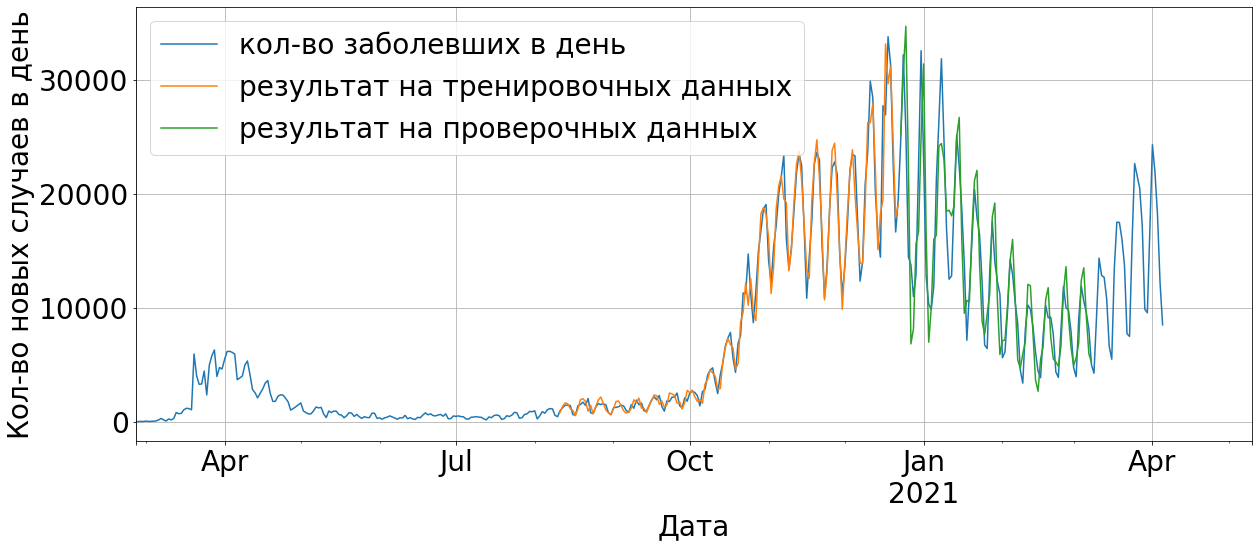

In [ ]:
validation_data_visual_path = 'validation_data.png'
ax = df.plot(x = 'Дата', y = ['кол-во заболевших в день', 'результат на тренировочных данных', 'результат на проверочных данных'],figsize=(20, 8), grid = 'True')
ax.set_ylabel('Кол-во новых случаев в день')
fig = ax.get_figure()
visualizaton_path = Country + '_Prediction' + '.png' 
fig.savefig(validation_data_visual_path, dpi = 150, bbox_inches = "tight")

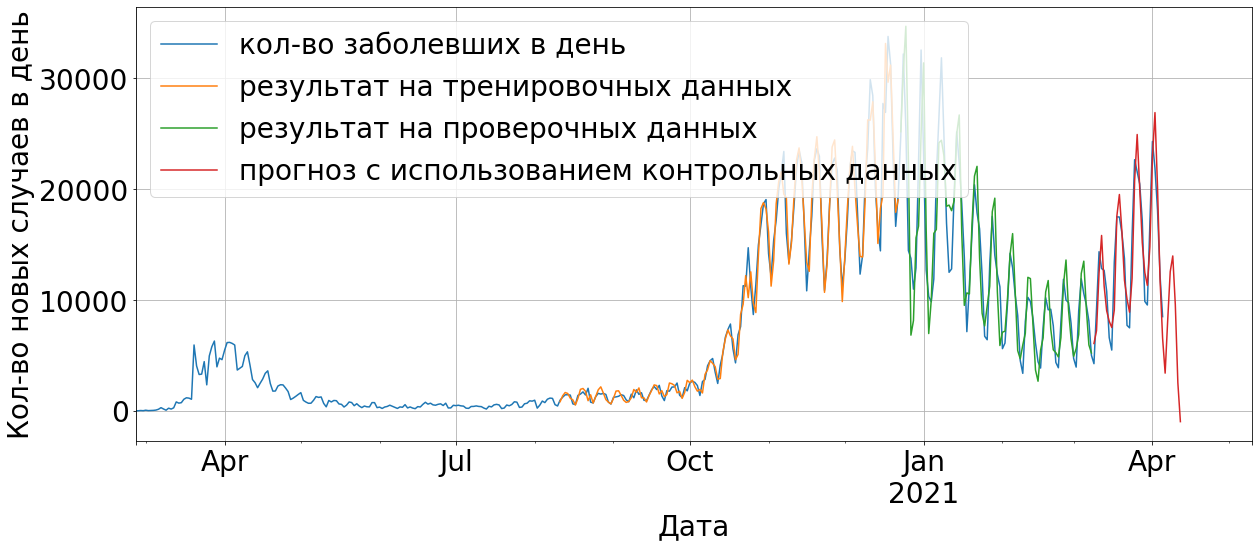

In [ ]:
predict_data_visual_path = 'predict_using_data.png'
ax = df.plot(x = 'Дата', y = ['кол-во заболевших в день', 'результат на тренировочных данных', 'результат на проверочных данных','прогноз c использованием контрольных данных'],figsize=(20, 8), grid = 'True')
ax.set_ylabel('Кол-во новых случаев в день')
fig = ax.get_figure()
visualizaton_path = Country + '_Prediction' + '.png' 
fig.savefig(predict_data_visual_path, dpi = 150, bbox_inches = "tight")

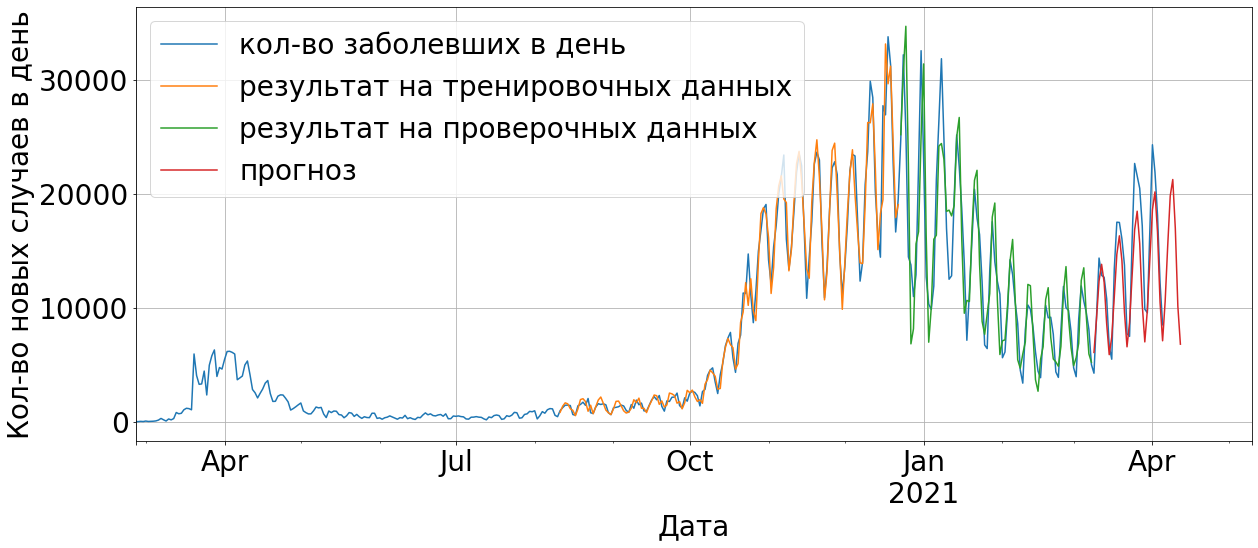

In [ ]:
predict_visual_path = 'predict_not_using_data.png'
ax = df.plot(x = 'Дата', y = ['кол-во заболевших в день', 'результат на тренировочных данных', 'результат на проверочных данных','прогноз'],figsize=(20, 8), grid = 'True')
ax.set_ylabel('Кол-во новых случаев в день')
fig = ax.get_figure()
visualizaton_path = Country + '_Prediction' + '.png' 
fig.savefig(predict_visual_path, dpi = 150, bbox_inches = "tight")

In [ ]:
from google.colab import files
files.download(path_checkpoint)
files.download(loss_path)
files.download(log_path)
files.download(hyperparameters_filename)
files.download(learning_parameters_filename)
#files.download(path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(hyperparameters_filename)
files.download(learning_parameters_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download(visualizaton_path)
files.download(raw_data_visual_path)
files.download(train_data_visual_path)
files.download(validation_data_visual_path)
files.download(predict_visual_path)
files.download(predict_data_visual_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
           ...      
519    202451.410153
520    198984.856550
521    200175.892062
522    191617.123503
523    194411.735476
Name: prediction, Length: 524, dtype: float64
0      16894
1      18093
2      19332
3      17987
4      22559
       ...  
337    72812
338    69613
339    50218
340    50776
341    57831
Name: New_cases, Length: 342, dtype: int64
        prediction  New_cases
0              NaN    16894.0
1              NaN    18093.0
2              NaN    19332.0
3              NaN    17987.0
4              NaN    22559.0
..             ...        ...
519  202451.410153        NaN
520  198984.856550        NaN
521  200175.892062        NaN
522  191617.123503        NaN
523  194411.735476        NaN

[524 rows x 2 columns]


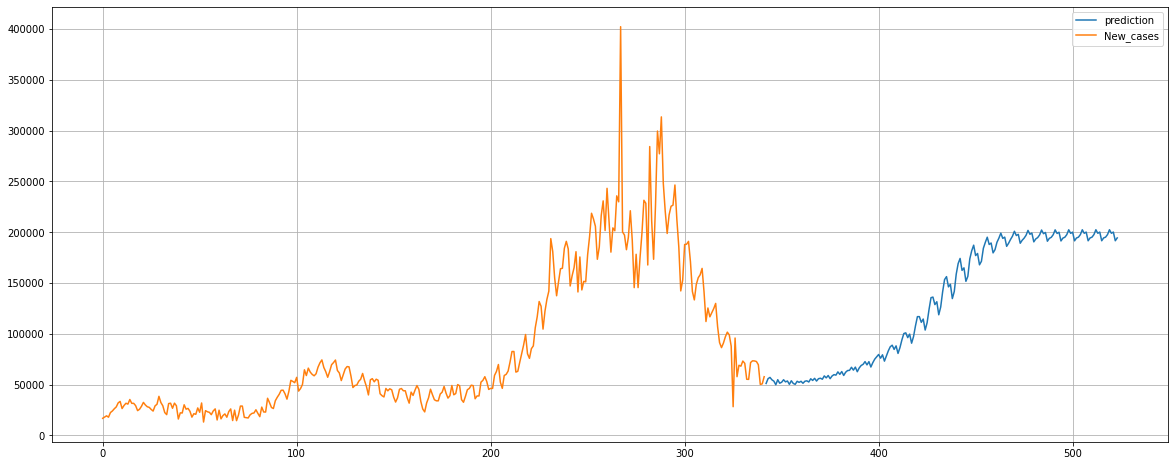

In [ ]:
"""
def unnormalize (data, mean, std):
    return data * std + mean

visual_prediction = np.empty(len(data))
visual_prediction[:] = np.nan



visual_prediction = np.concatenate((visual_prediction, result))

visual_prediction = pd.Series(visual_prediction, name="prediction")
visual_prediction = unnormalize(visual_prediction, mean, std)
print(visual_prediction)
print(country_series)

df = pd.concat([visual_prediction, country_series], axis=1)

print(df)

ax = df.plot(figsize=(20, 8), grid = 'True')